## Non Linear(Sigmoid) Regression
### For familiar peeps, No Description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("./china_gdp.csv")
df.head(8)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10


In [3]:
df.isnull().any().any()

False

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,55.0,1.987000e+03,1.602082e+01,1.960000e+03,1.973500e+03,1.987000e+03,2.000500e+03,2.014000e+03
Value,55.0,1.437042e+12,2.500085e+12,4.668518e+10,1.395123e+11,3.074796e+11,1.268748e+12,1.035483e+13


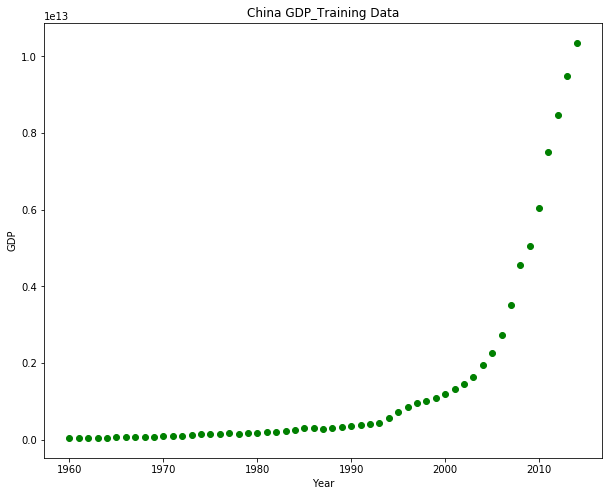

In [5]:
year = df["Year"]
value = df["Value"]
plt.figure(figsize=(10,8)) # 4:5(length:width) Ratio just Engineering Drawing Things
plt.scatter(year,value,color='g')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('China GDP_Training Data')
plt.show()

## Sigmoid

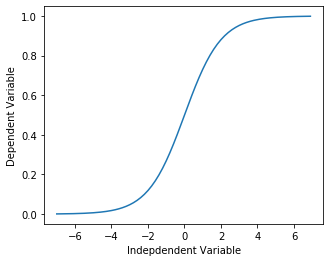

In [6]:
X = np.arange(-7.0, 7.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.figure(figsize=(5,4))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [7]:
def sigmoid(x,Beta_1,Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

In [8]:
# Normalization
xdata = ( year )/ ( max(year) )
xdata.head(8)

0    0.973188
1    0.973684
2    0.974181
3    0.974677
4    0.975174
5    0.975670
6    0.976167
7    0.976663
Name: Year, dtype: float64

In [9]:
ydata = (value)/( max(value))
ydata.head(8)

0    0.005716
1    0.004786
2    0.004509
3    0.004838
4    0.005704
5    0.006732
6    0.007328
7    0.006959
Name: Value, dtype: float64

In [10]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid,xdata,ydata)
print("Beta_1: {} , Beta_2:{}".format(popt[0],popt[1]))

Beta_1: 690.4517109968472 , Beta_2:0.9972071272536187


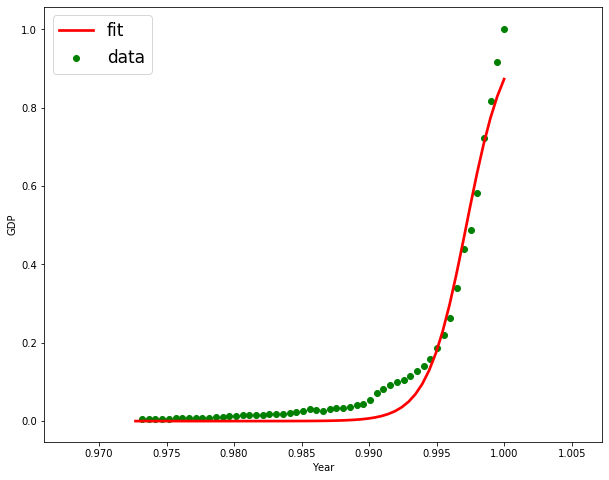

In [11]:
x = np.linspace(1960, 2015, 55)
x = ( x/max(x) )
plt.figure(figsize=(10,8))
y = sigmoid(x, *popt)
plt.scatter(xdata, ydata, color='g', label='data')
plt.plot(x,y,linewidth=2.7,color='r', label='fit')
plt.legend(loc='best',prop={'size':17})
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()